In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import GRU, Dense, Input # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
import matplotlib.pyplot as plt

# Sample data: sequence of numbers
data = np.sin(np.linspace(0, 100, 1000))

# Normalize the data
data = (data - np.min(data)) / (np.max(data) - np.min(data))

# Function to create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(data, seq_length)

df = pd.DataFrame(X, columns=[f'f_t-{seq_length-i}' for i in range(seq_length)])
df['f_t'] = y
df.round(2).head()


,f_t-10,f_t-9,f_t-8,f_t-7,f_t-6,f_t-5,f_t-4,f_t-3,f_t-2,f_t-1,f_t
0,0.50,0.55,0.60,0.65,0.69,0.74,0.78,0.82,0.86,0.89,0.92
1,0.55,0.60,0.65,0.69,0.74,0.78,0.82,0.86,0.89,0.92,0.95
2,0.60,0.65,0.69,0.74,0.78,0.82,0.86,0.89,0.92,0.95,0.97
3,0.65,0.69,0.74,0.78,0.82,0.86,0.89,0.92,0.95,0.97,0.98
4,0.69,0.74,0.78,0.82,0.86,0.89,0.92,0.95,0.97,0.98,0.99


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 1.3096e-06  
Test Loss: 1.2961908169017988e-06


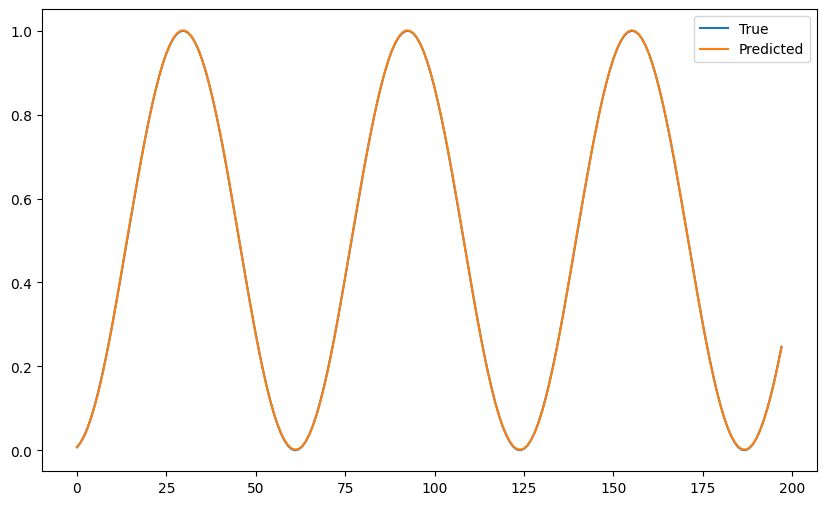

In [22]:
# Reshape X to be [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define the GRU model
model = Sequential()
model.add(Input(shape=(seq_length, 1)))
model.add(GRU(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose = 0)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test, verbose =0)


# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [23]:
train_size = int(len(X) * 0.8)
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:].copy()
df_test['Prediction'] = predictions
df_test.round(2).head()

,f_t-10,f_t-9,f_t-8,f_t-7,f_t-6,f_t-5,f_t-4,f_t-3,f_t-2,f_t-1,f_t,Prediction
792,0.16,0.13,0.10,0.07,0.05,0.03,0.01,0.00,0.00,0.00,0.01,0.01
793,0.13,0.10,0.07,0.05,0.03,0.01,0.00,0.00,0.00,0.01,0.02,0.02
794,0.10,0.07,0.05,0.03,0.01,0.00,0.00,0.00,0.01,0.02,0.03,0.03
795,0.07,0.05,0.03,0.01,0.00,0.00,0.00,0.01,0.02,0.03,0.05,0.05
796,0.05,0.03,0.01,0.00,0.00,0.00,0.01,0.02,0.03,0.05,0.08,0.08
